### Interpretation of the LR models

Here, we compare the coefficients learned by the different linear regression models.

These coefficients can be downloaded from Zenodo.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

### Read and filter weights

In [2]:
h_glia_all = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/LR_weights/LR_all_glia.csv', index_col=0)
h_neur_all = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/LR_weights/LR_all_neur.csv', index_col=0)

h_glia_var = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/LR_weights/LR_var01_glia.csv', index_col=0)
h_neur_var = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/LR_weights/LR_var01_neur.csv', index_col=0)

In [3]:
w = pd.concat((h_glia_all, h_neur_all, h_glia_var, h_neur_var), axis=1)
w.columns = ['HPC - glia (all)', 'HPC - neur (all)', 'HPC - glia (var)', 'HPC - neur (var)']
w.iloc[:5]

,HPC - glia (all),HPC - neur (all),HPC - glia (var),HPC - neur (var)
AATF_start,0.001789,0.002657,-0.028788,-0.015118
ABCF1_start,-0.008563,-0.001489,-0.058113,0.005881
AKAP1_start,0.014131,0.022668,-0.001819,0.004053
APOBEC3C_start,0.000020,0.000248,-0.003887,-0.027109
AQR_start,-0.010190,-0.012180,-0.005953,-0.018397


Read the RBP counts, so we can use this to filter the RBPs. We will only keep RBPs with at least 50 binding sites. If there are few binding sites, the coefficient of the RBP might not be estimated with enough confidence.

In [4]:
# HPC
PSI_glia = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/PSI/PSI_glia_norm.csv', index_col=0)
PSI_neur = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/PSI/PSI_neur_norm.csv', index_col=0)

# Check which exons are variable
exons_all = PSI_glia['0'].notna() & PSI_neur['0'].notna()
exons_var01 = PSI_glia.index[(np.abs(PSI_glia['0'] - PSI_neur['0']) > 0.1)]

RBP = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/RBP/RBP_peaks.csv', index_col=0)
RBP_hpc_var01 = np.sum(RBP.loc[exons_var01] > 0)
RBP_hpc_all = np.sum(RBP.loc[exons_all] > 0)

In [5]:
RBP_counts = pd.concat((RBP_hpc_all, RBP_hpc_var01), axis=1)
RBP_counts.columns = ['HPC (all)', 'HPC (var)']
RBP_counts.iloc[:5]

,HPC (all),HPC (var)
AATF_start,1545,381
ABCF1_start,1043,260
AKAP1_start,3071,766
APOBEC3C_start,2358,528
AQR_start,11642,2759


In [6]:
print(np.shape(w))

# There should be enough binding sites to estimate a coefficient 
w_filt = w[np.min(RBP_counts.iloc[:,:4], axis=1) >= 50] 
print(np.shape(w_filt))

# There should be at least one model where a feature has a bit a high value, otherwise it's not interesting in the heatmap
w_filt2 = w_filt[np.max(np.abs(w_filt), axis=1) > 0.05]
print(np.shape(w_filt2))

(732, 4)
(618, 4)
(191, 4)


#### Figure 3A

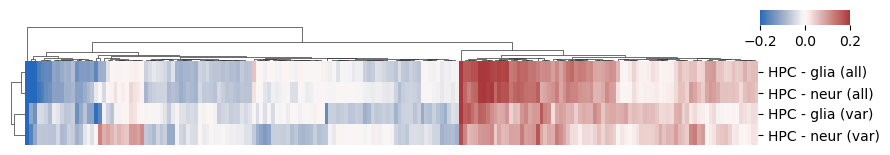

In [7]:
sns.clustermap(w_filt2.T, figsize=(9,1.5), dendrogram_ratio=[0.02,.3],
              cmap='vlag', method='complete',
               center=0, 
               vmin=-0.2, vmax=0.2,
               cbar_pos=(0.85, 0.9, 0.1, 0.1), 
                   cbar_kws=dict(orientation='horizontal'),
              xticklabels=False)
# plt.savefig('../../Evaluate models/Figures/Heatmap.pdf', bbox_inches='tight')
plt.show()

#### Figure 3B - hnRNP

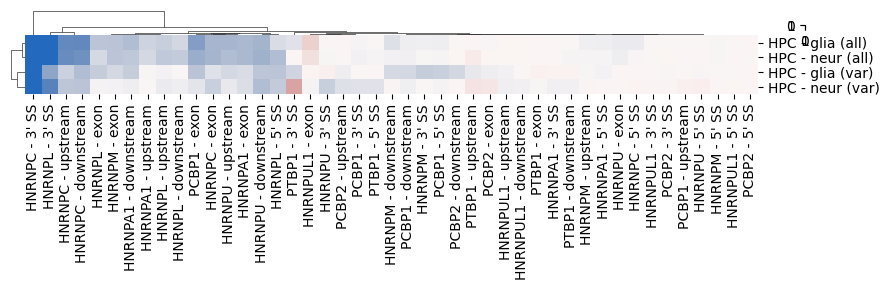

In [8]:
w_filt_genes = pd.DataFrame(w_filt.index)[0].str.split('_', n=1, expand=True)

hnrnp = ['HNRNPA1', 'HNRNPC', 'HNRNPL', 'HNRNPM', 'HNRNPU', 'HNRNPUL1',
       'PCBP1','PCBP2', 'PTBP1']

sns.clustermap(w_filt.iloc[np.isin(w_filt_genes[0], hnrnp)].T, figsize=(9,3), dendrogram_ratio=[0.02,.3],
              cmap='vlag', method='complete',
               center=0, 
               cbar_pos=(0.9, 0.9, 0.0, 0.), 
               vmin=-0.2, vmax=0.2, cbar=False,
              xticklabels=['HNRNPA1 - upstream', 'HNRNPC - upstream', 
                           'HNRNPL - upstream', 'HNRNPM - upstream',
                           'HNRNPU - upstream', 'HNRNPUL1 - upstream', 
                           'PCBP1 - upstream', 'PCBP2 - upstream',
                           'PTBP1 - upstream', "HNRNPA1 - 3' SS", 
                           "HNRNPC - 3' SS",
                           "HNRNPL - 3' SS", 
                           "HNRNPM - 3' SS", 
                           "HNRNPU - 3' SS",
                           "HNRNPUL1 - 3' SS", 
                           "PCBP1 - 3' SS", 
                           "PCBP2 - 3' SS",
                           "PTBP1 - 3' SS", 'HNRNPA1 - exon', 
                           'HNRNPC - exon', 'HNRNPL - exon',
                           'HNRNPM - exon', 'HNRNPU - exon', 
                           'HNRNPUL1 - exon', 'PCBP1 - exon',
                           'PCBP2 - exon', 'PTBP1 - exon', 'HNRNPA1 - downstream',
                           'HNRNPC - downstream', 'HNRNPL - downstream',
                           'HNRNPM - downstream', 'HNRNPU - downstream', 'HNRNPUL1 - downstream',
                           'PCBP1 - downstream', 'PCBP2 - downstream',
                           'PTBP1 - downstream', "HNRNPA1 - 5' SS", 
                           "HNRNPC - 5' SS",
                           "HNRNPL - 5' SS", "HNRNPM - 5' SS",
                           "HNRNPU - 5' SS", "HNRNPUL1 - 5' SS", 
                           "PCBP1 - 5' SS", "PCBP2 - 5' SS",
                           "PTBP1 - 5' SS"]
              )
# plt.savefig('../../Evaluate models/Figures/Heatmap_HNRNP.pdf', bbox_inches='tight')
plt.show()

#### Figure 3C - cell type specific RBPs

In [9]:
# Find top 10 with biggest different between neur and glia HPC var
ct_specific = np.abs(w_filt['HPC - neur (var)'] - w_filt['HPC - glia (var)']).sort_values(ascending=False)[:10].index
w_filt.loc[ct_specific]

,HPC - glia (all),HPC - neur (all),HPC - glia (var),HPC - neur (var)
QKI_start_overlap,-0.098697,-0.004609,-0.154732,0.121338
MATR3_start_overlap,-0.156540,-0.024425,-0.190873,-0.000462
U2AF2_exon_complete,-0.003861,0.010134,-0.071185,0.069887
PTBP1_start_overlap,-0.032418,0.001286,-0.048690,0.088437
SSB_end_overlap,0.001870,0.007953,0.002986,0.112833
QKI_end,0.002426,-0.037638,-0.006597,-0.113609
ZNF622_exon_complete,0.000597,-0.000077,-0.006748,-0.113012
STAU2_start_overlap,-0.126207,-0.085894,-0.115437,-0.011643
IGF2BP1_end_overlap,0.162657,0.124775,0.166455,0.067298
EWSR1_start,0.058579,0.097100,0.021596,0.117653


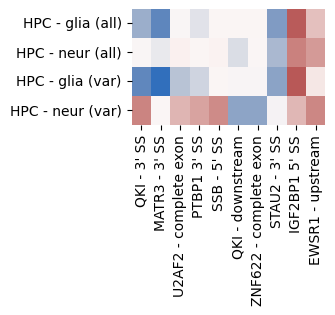

In [10]:
plt.figure(figsize=[2.5,1.5])
sns.heatmap(
    w_filt.loc[ct_specific].T, 
              cmap='vlag', 
               center=0, 
               vmin=-0.2, vmax=0.2, cbar=False,
              xticklabels=["QKI - 3' SS", "MATR3 - 3' SS", 
                           'U2AF2 - complete exon', "PTBP1 3' SS",
                           "SSB - 5' SS", 'QKI - downstream',
                           'ZNF622 - complete exon', "STAU2 - 3' SS", 
                           "IGF2BP1 5' SS", 'EWSR1 - upstream']
              )
# plt.savefig('../../Evaluate models/Figures/Heatmap_ctspecific.pdf', bbox_inches='tight')
plt.show()